## Observations and Insights 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [114]:
# Checking the number of mice.
number_of_mice = len(combined_data_df["Mouse ID"].value_counts())
number_of_mice

249

In [115]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(*duplicate_mouse_id)

g989


In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_duplicate_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989",]
data_for_duplicate_mouse.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df.copy()
clean_combined_data_df = clean_combined_data_df.set_index("Mouse ID")
clean_combined_data_df.drop(["g989"], axis = 0, inplace = True)

In [118]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df = clean_combined_data_df.reset_index()
clean_combined_data_df_count = len(clean_combined_data_df["Mouse ID"].value_counts())
clean_combined_data_df_count

248

In [119]:
# clean_combined_data_df-excludes Mouse ID g989
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined_data_df_stats = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_combined_data_df_stats["Mean Tumor Volume"] = clean_combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Median Tumor Volume"] = clean_combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Volume Variance"] = clean_combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Std. Dev."] = clean_combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
clean_combined_data_df_stats["Tumor Volume Std. Err."] = clean_combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
clean_combined_data_df_stats_summary = clean_combined_data_df_stats[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Std. Dev.", "Tumor Volume Std. Err."]]  

# Assemble the resulting series into a single summary dataframe.
# clean_combined_data_df_stats_summary

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined_data_df_stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [122]:
clean_combined_data_df_stats_clean_agg = clean_combined_data_df
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg.groupby("Drug Regimen")
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg.agg(['mean', 'median', 'var', 'std', 'sem'])                                            
clean_combined_data_df_stats_clean_agg = clean_combined_data_df_stats_clean_agg['Tumor Volume (mm3)']
clean_combined_data_df_stats_clean_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

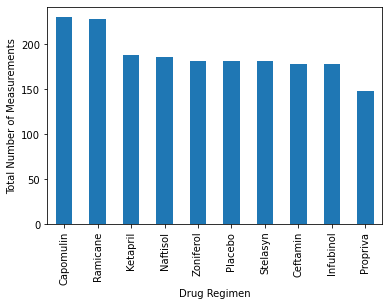

In [136]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_pandas_chart = clean_combined_data_df
clean_pandas_chart = clean_pandas_chart.groupby("Drug Regimen").Timepoint.count()
clean_pandas_chart = pd.DataFrame(clean_pandas_chart)
clean_pandas_chart = clean_pandas_chart.sort_values(["Timepoint"],ascending=False)
clean_pandas_chart.plot.bar(xlabel="Drug Regimen", ylabel="Total Number of Measurements", legend="" )

In [124]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
clean_pyplot_chart = clean_combined_data_df



In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [128]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [131]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
